# Linear Regression Demo using Pytorch

In [1]:
%matplotlib inline
import numpy as np
import torch
import matplotlib.pyplot as plt
from torch.utils import data
from torch import nn

## 一、生成数据集

features: tensor([0.7177, 0.1825]) 
label: tensor([5.0190])


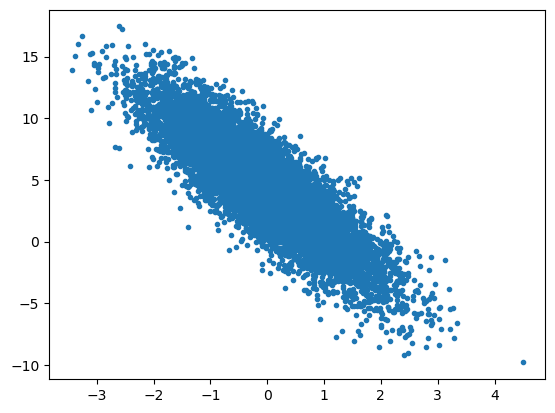

In [2]:
def generate_dataset(w, b, num_examples):
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = generate_dataset(true_w, true_b, 10000)


print('features:', features[0],'\nlabel:', labels[0])

plt.scatter(features[:, 1], labels, marker=".")
plt.show()

## 二、读取数据集

In [3]:
def load_array(data_arrays, batch_size, is_train=True):
    """构造一个PyTorch数据迭代器"""
    dataset = data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset, batch_size, shuffle=is_train)

batch_size = 10
data_iter = load_array((features, labels), batch_size)

## 三、定义模型

In [4]:
net = nn.Sequential(nn.Linear(2, 1))

## 四、初始化参数

In [5]:
net[0].weight.data.normal_(0, 0.01)
net[0].bias.data.fill_(0)

tensor([0.])

## 五、定义`loss funciton`

In [6]:
loss = nn.MSELoss()

## 六、定义优化算法

In [7]:
trainer = torch.optim.SGD(net.parameters(), lr=0.03)

## 七、训练模型

In [8]:
num_epochs = 3
for epoch in range(num_epochs):
    for X, y in data_iter:
        l = loss(net(X) ,y)
        trainer.zero_grad()
        l.backward()
        trainer.step()
    l = loss(net(features), labels)
    print(f'epoch {epoch + 1}, loss {l:f}')

epoch 1, loss 0.000102
epoch 2, loss 0.000103
epoch 3, loss 0.000103


In [9]:
w = net[0].weight.data
print('w的估计误差：', true_w - w.reshape(true_w.shape))
b = net[0].bias.data
print('b的估计误差：', true_b - b)

w的估计误差： tensor([ 0.0007, -0.0006])
b的估计误差： tensor([-0.0004])
